### Système de Scoring de Solvabilité et Prédiction d’Approbation de Prêts


In [29]:
#Import des packages
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import pickle


## 1. EDA : Exploratory Data Analysis

In [30]:
#Lecture de la base de donnée la base de donnée
data=pd.read_csv("train.csv")
df=data.copy()

###  Analyse de la forme
1. La variable target: Loan_Status
2. Nombre de lignes et de colonnes : (614, 13)
3. Types de variables :
Quantitatives: 8
Qualitative: 5
7. Valeurs manquantes:
Très peu de variables manquantes (toutes inférieur à 8%)

In [31]:
# Configure pandas pour afficher jusqu'à  lignes complètes dans la sortie (par défaut, il coupe après quelques lignes)
pd.set_option("display.max_row", df.shape[0]+1)


In [32]:
#Afficher les 5 première lignes 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
#La taille du dataset
df.shape

(614, 13)

In [34]:
#Les types de variables
df.dtypes.value_counts()

object     8
float64    4
int64      1
Name: count, dtype: int64

<Axes: ylabel='count'>

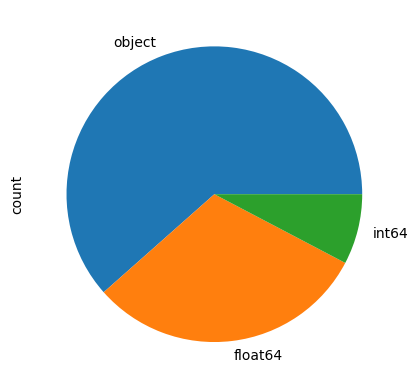

In [35]:
df.dtypes.value_counts().plot.pie()

In [36]:
#Valeur manquantes
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: >

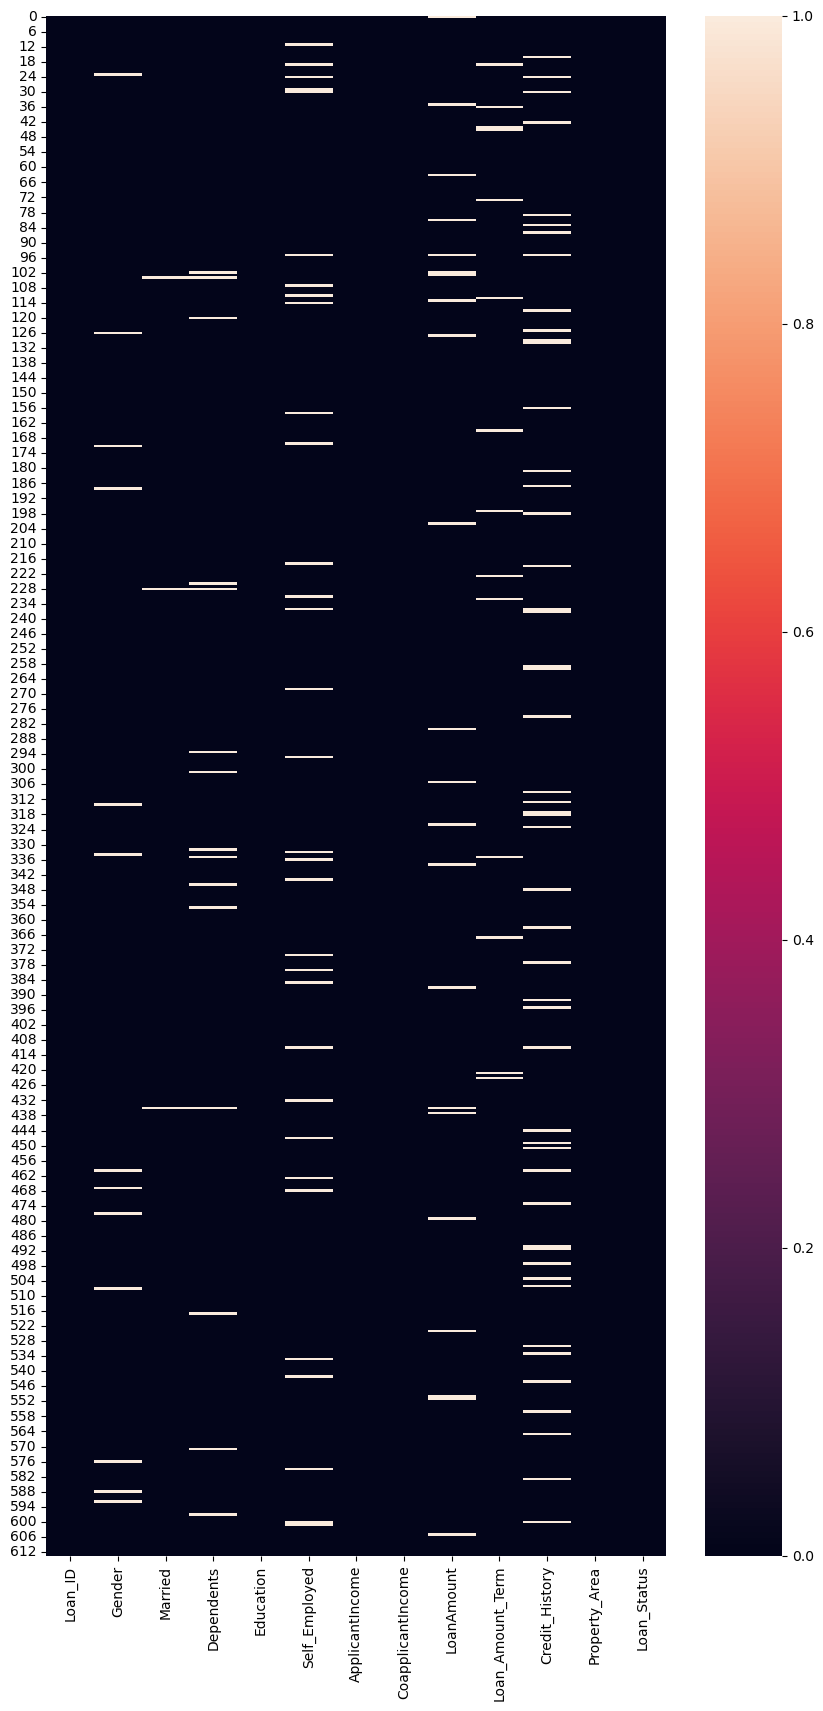

In [37]:
#Valeur manquantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))
sns.heatmap(df.isna())

In [38]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Loan_ID              0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_Status          0.000000
Property_Area        0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

In [39]:
missing_pourcentage=df.isna().sum()/df.shape[0]
missing_pourcentage[(df.isna().sum()/df.shape[0])>0]

Gender              0.021173
Married             0.004886
Dependents          0.024430
Self_Employed       0.052117
LoanAmount          0.035831
Loan_Amount_Term    0.022801
Credit_History      0.081433
dtype: float64

### Analyse du fond
1. Visualisation de la variable target:  Notre dataset est déséquilibré

2. Signification des variables:

- Catégorielles

La distribution des variables catégorielles montre que la majorité des emprunteurs sont mariés, de sexe masculin, résident en zone urbaine ou semi-urbaine, ne sont pas travailleurs indépendants, sont diplômés et n’ont aucune personne à charge. La variable Loan_Status présente un déséquilibre avec une proportion plus élevée d'approbations de prêts, ce qui peut influencer la performance des modèles de classification. Ces distributions justifient l’imputation par le mode pour les variables catégorielles présentant des valeurs manquantes.

- Numériques
- 
Les variables de revenu et de montant ont une forte asymétrie et des valeurs extrêmes.
La durée du prêt est quasi constante (360 mois).
L’historique de crédit est binaire et déséquilibré, majoritairement positif

3. Relation variables
- Catégorielle/Target
  
L’analyse graphique des variables catégorielles montre que certains profils d’emprunteurs présentent une probabilité plus élevée d’obtenir un prêt. En particulier, les hommes et les personnes sans dépendants constituent la majorité des demandes de prêt et affichent les taux d’approbation les plus élevés. Toutefois, la comparaison des proportions suggère que le genre n’est pas un facteur déterminant dans la décision d’octroi, contrairement à la charge familiale : on observe une diminution progressive des acceptations lorsque le nombre de personnes à charge augmente, indiquant un impact potentiel sur la capacité de remboursement perçue par les institutions financières.

De plus, les emprunteurs non indépendants, diplômés, et résidant en zone urbaine, rurale ou semi-urbaine présentent des tendances similaires, avec davantage d’approbations que de refus. Cette constance dans les distributions montre que ces caractéristiques socio-démographiques exercent un impact limité sur la décision finale.

Ces observations permettent ainsi d’identifier les variables susceptibles d’influencer la décision d’octroi et d’orienter la sélection des caractéristiques pertinentes pour la modélisation, en mettant en évidence l’importance de facteurs liés à la stabilité financière et à la capacité de remboursement.

- Numérique/Target
L’analyse des variables numériques montre que la plupart d’entre elles (revenu du demandeur, revenu du coemprunteur, montant du prêt, durée) n’expliquent pas clairement l’approbation ou le refus d’un prêt. En revanche, l’historique de crédit (Credit_History) apparaît comme le facteur décisif : les demandeurs ayant un bon historique obtiennent majoritairement leur prêt, tandis que ceux sans historique positif sont généralement refusés. Ainsi, Credit_History est la variable la plus déterminante pour prédire Loan_Status, bien plus que les variables financières classiques.

- Corrélation entre les variable numérique
 les revenus influencent le montant demandé, mais l’approbation du prêt dépend surtout de l’historique de crédit, pas de ces variables numériques.


In [40]:
#Visualisation de la variable target
df["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [41]:
#Histogramme des variables des variables continues
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
### Signification des variables

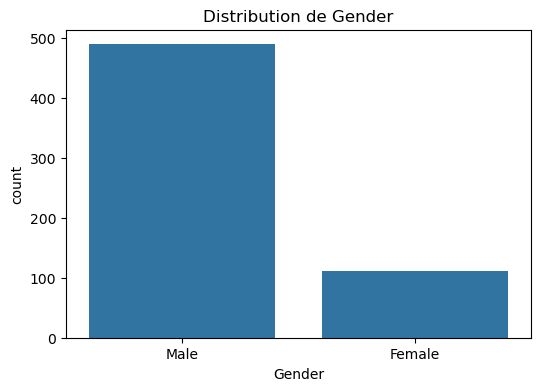

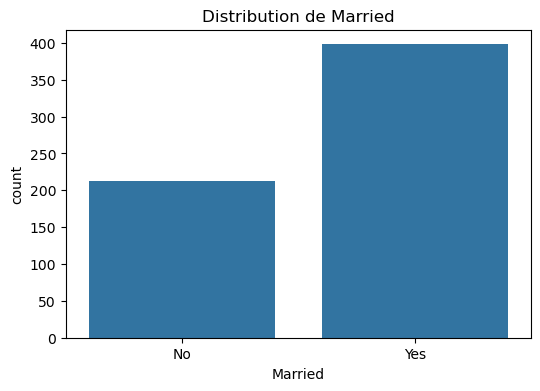

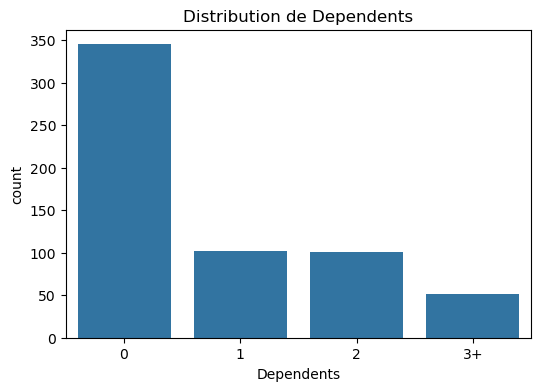

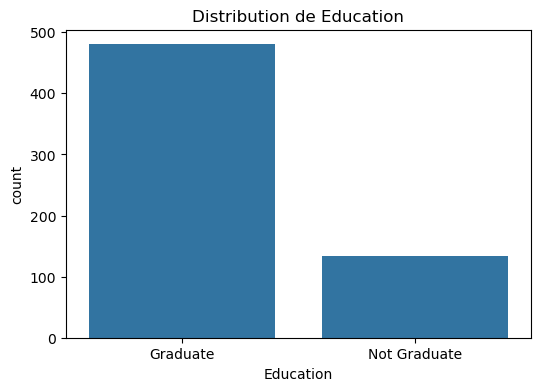

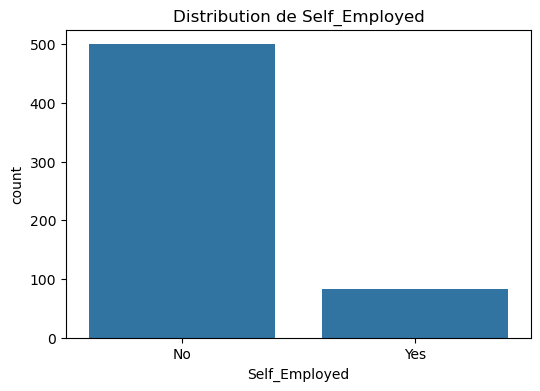

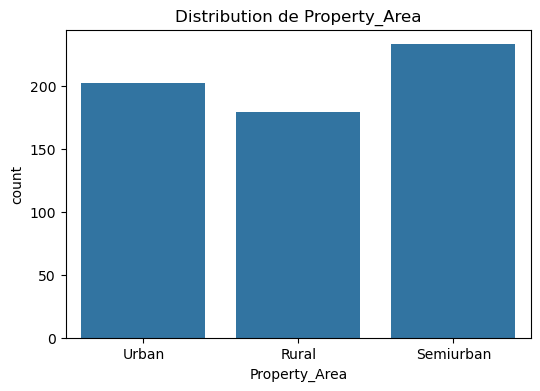

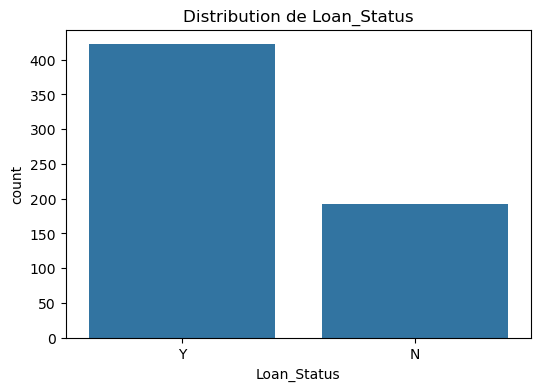

In [43]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution de {col}")
    plt.show()

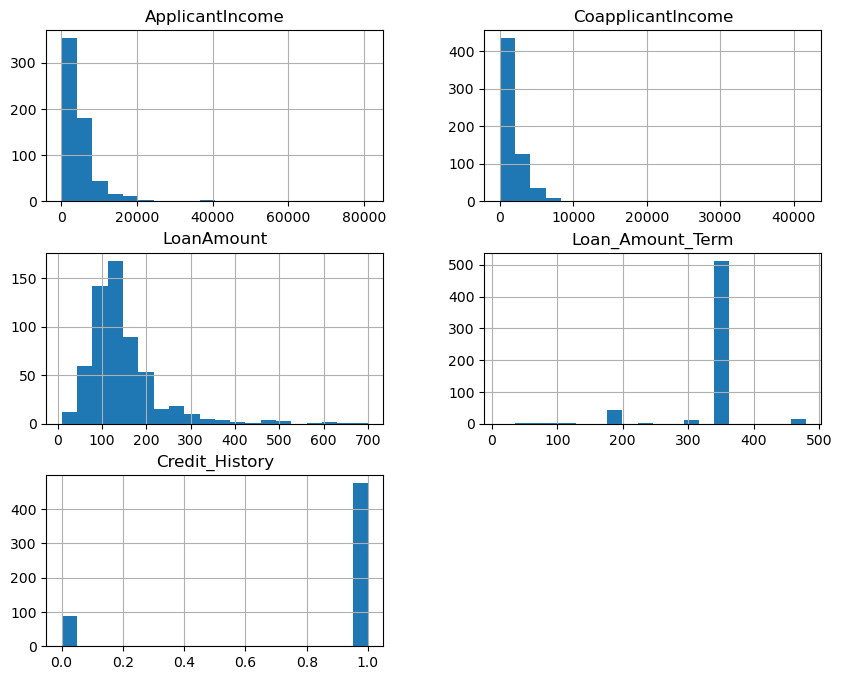

In [44]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Histogrammes
df[numerical_cols].hist(bins=20, figsize=(10,8))
plt.show()



1. ApplicantIncome (Revenu du demandeur)

La distribution est fortement asymétrique à droite.

La majorité des demandeurs ont un revenu inférieur à 20 000, mais quelques valeurs extrêmes montent à ~80 000.

Une transformation logarithmique pourrait aider pour la modélisation.

2. CoapplicantIncome (Revenu du co-demandeur)

Même structure que pour ApplicantIncome, mais avec des revenus généralement plus bas.

Distribution très asymétrique, avec la plupart des valeurs < 10 000.

Une transformation log peut également être utile ici.

3. LoanAmount (Montant du prêt)

Distribution asymétrique à droite.

La plupart des montants de prêt se situent entre 100 et 200, mais certains vont jusqu’à 700+.

La distribution n’est pas normale : il peut être utile d’appliquer une transformation ou d’étudier les valeurs extrêmes.

4. Loan_Amount_Term (Durée du prêt)

La variable est quasi-catégorielle.

Énorme concentration autour de 360 mois (30 ans), ce qui est la durée standard des prêts.

Quelques pics aux environs de 180, 300 et 480 mois.

À traiter comme une variable catégorielle, pas comme une variable continue.

5. Credit_History (Historique de crédit)

Distribution très claire : principalement 1.0 (bon historique).

Minorité de valeurs à 0.0.

Variable probablement très prédictive car elle sépare bien les profils.


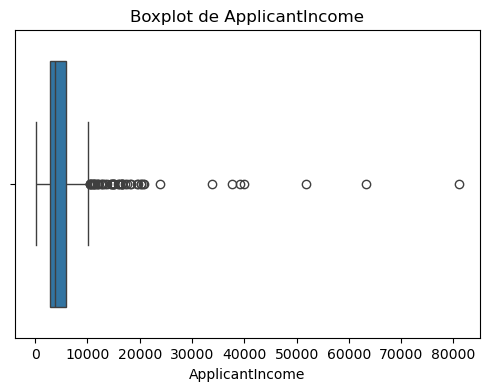

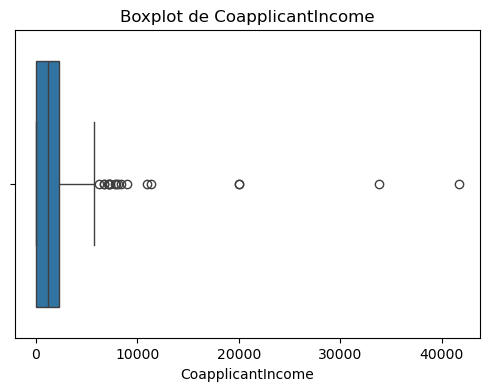

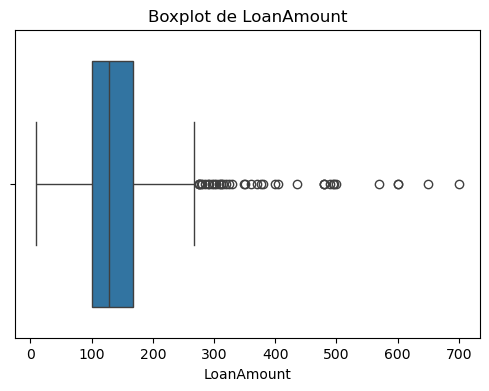

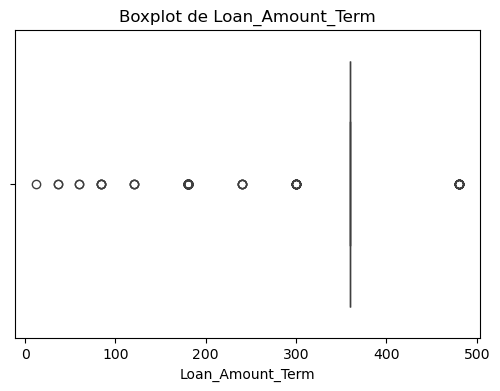

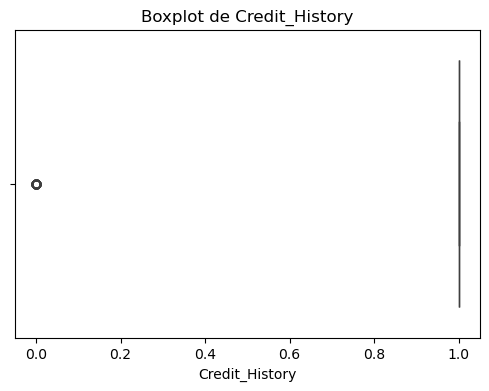

In [45]:
# Boxplots pour détecter outliers
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

1. ApplicantIncome (Revenu du demandeur)

La distribution est fortement asymétrique à droite.

La majorité des demandeurs ont un revenu inférieur à 20 000, mais quelques valeurs extrêmes montent à ~80 000.

Une transformation logarithmique pourrait aider pour la modélisation.

2. CoapplicantIncome (Revenu du co-demandeur)

Même structure que pour ApplicantIncome, mais avec des revenus généralement plus bas.

Distribution très asymétrique, avec la plupart des valeurs < 10 000.

Une transformation log peut également être utile ici.

3. LoanAmount (Montant du prêt)

Distribution asymétrique à droite.

La plupart des montants de prêt se situent entre 100 et 200, mais certains vont jusqu’à 700+.

La distribution n’est pas normale : il peut être utile d’appliquer une transformation ou d’étudier les valeurs extrêmes.

4. Loan_Amount_Term (Durée du prêt)

La variable est quasi-catégorielle.

Énorme concentration autour de 360 mois (30 ans), ce qui est la durée standard des prêts.

Quelques pics aux environs de 180, 300 et 480 mois.

À traiter comme une variable catégorielle, pas comme une variable continue.

5. Credit_History (Historique de crédit)

Distribution très claire : principalement 1.0 (bon historique).

Minorité de valeurs à 0.0.

Variable probablement très prédictive car elle sépare bien les profils.

### Relation avec la cible

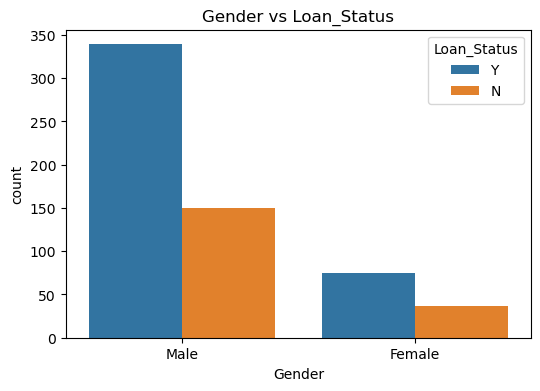

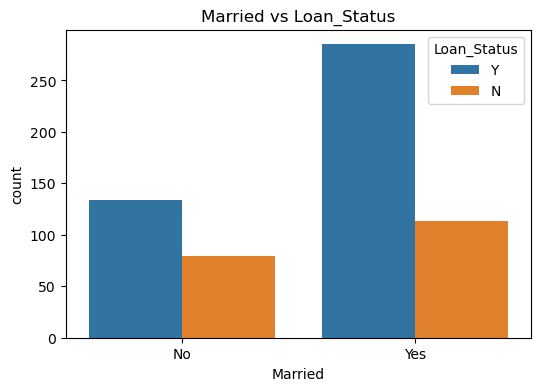

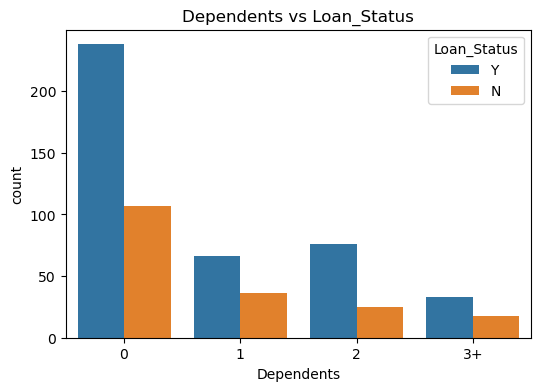

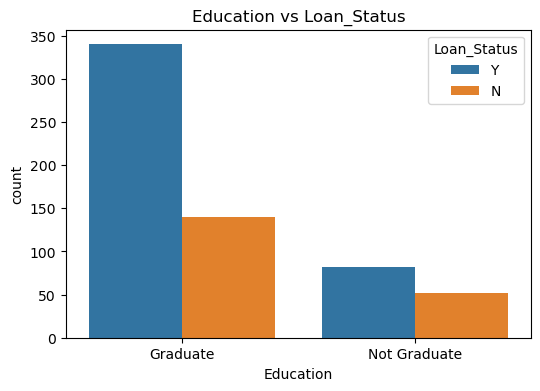

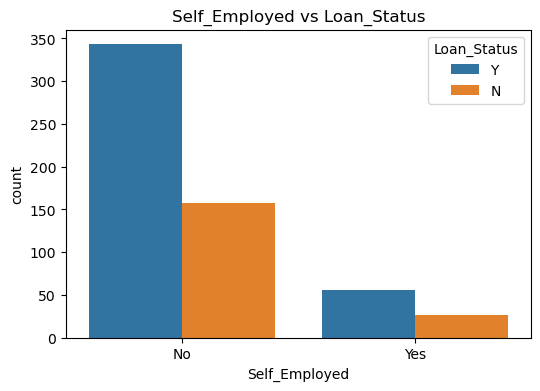

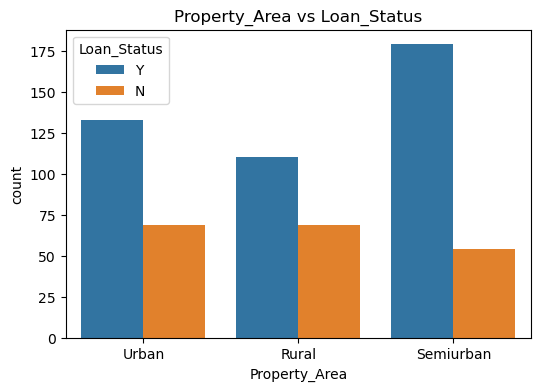

In [46]:
# Relation variables catégorielles/ Target
for col in categorical_cols[:-1]:  # exclure Loan_Status
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()

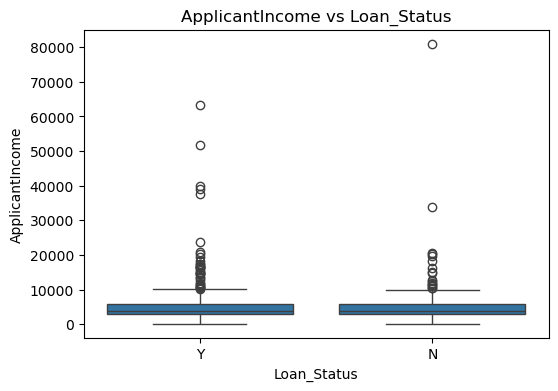

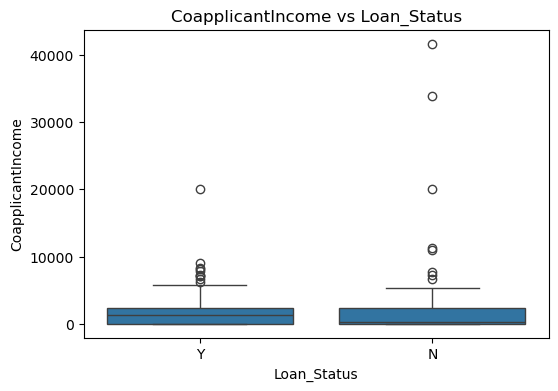

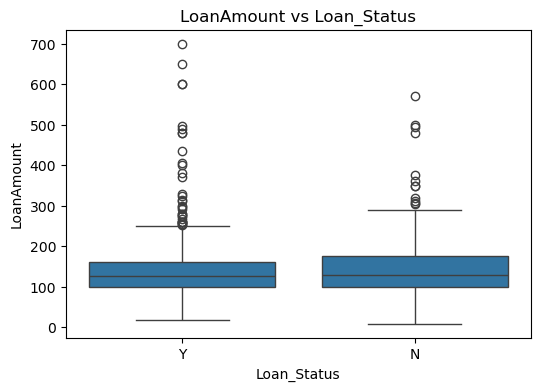

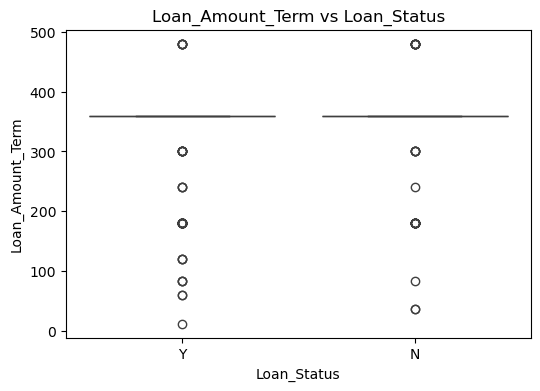

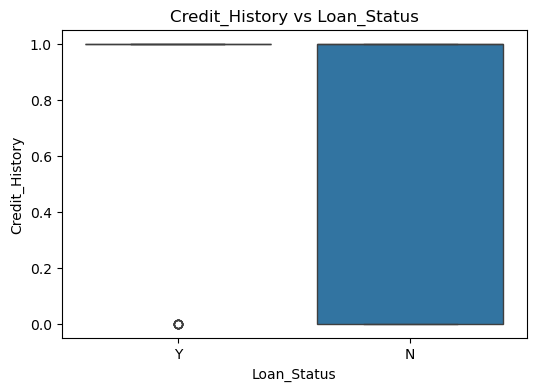

In [47]:
# Relation avec Loan_Status
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()


 1. ApplicantIncome vs Loan_Status

Les revenus des demandeurs (ApplicantIncome) ne semblent pas montrer une différence marquée entre les prêts approuvés (Y) et refusés (N).

Les deux groupes présentent de nombreux outliers : certains demandeurs avec revenus très élevés obtiennent un prêt, d’autres non.

 Conclusion : ApplicantIncome seul n’est probablement pas un facteur déterminant pour l’approbation.

2. CoapplicantIncome vs Loan_Status

Le revenu du co-demandeur (CoapplicantIncome) montre également peu de différence entre les statuts Y et N.

Beaucoup de valeurs sont proches de zéro, signe que de nombreux demandeurs n’ont pas de coemprunteur.

 Conclusion : Cette variable n’a probablement qu’un poids modéré dans la classification.

 3. LoanAmount vs Loan_Status

Les montants de prêts demandés (LoanAmount) sont assez similaires entre les prêts approuvés et refusés.

Les valeurs extrêmes existent dans les deux groupes.

 Conclusion : Le montant du prêt ne semble pas expliquer les refus/approbations à lui seul.

 4. Loan_Amount_Term vs Loan_Status

La durée du prêt (Loan_Amount_Term) est presque identique pour les deux groupes.

La plupart des prêts sont sur 360 mois, donc peu de variabilité.

 Conclusion : Variable peu discriminante.

 5. Credit_History vs Loan_Status → Variable la plus discriminante

Le graphique montre une différence très nette :

Les prêts approuvés (Y) sont presque uniquement associés à un Credit_History = 1.

Lorsqu’il est égal à 0, le prêt est presque toujours refusé.

 Conclusion : Credit_History est de loin la variable la plus importante pour prédire Loan_Status.

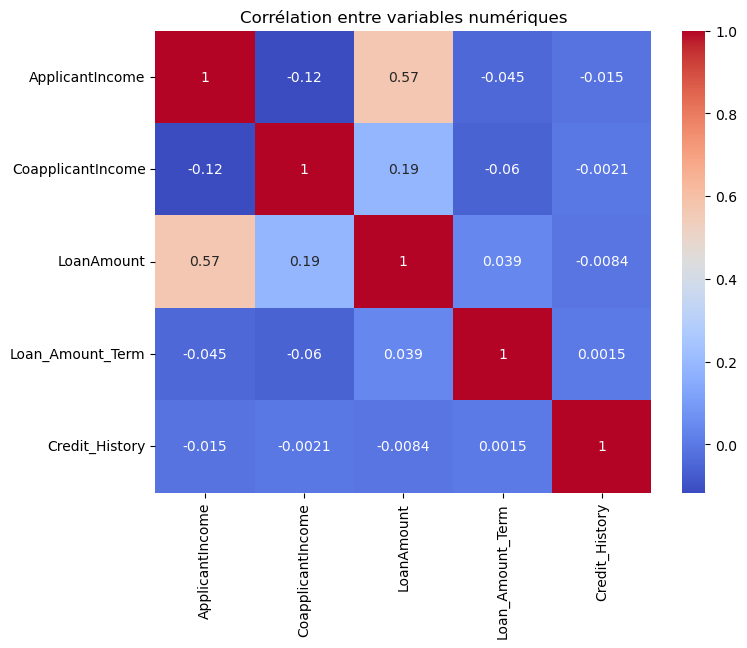

In [48]:
# Analyse des corrélations
# Corrélation entre variables numériques
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()


Le heatmap montre que :

La seule corrélation importante est entre ApplicantIncome et LoanAmount (0.57).

Les autres variables numériques n’ont pas de relations fortes entre elles.

Credit_History est indépendant des variables financières, ce qui renforce son rôle central dans la décision de prêt.

 En résumé : les revenus influencent le montant demandé, mais l’approbation du prêt dépend surtout de l’historique de crédit, pas de ces variables numériques.

## Prétratement des donnnées

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_loan_data(df):
    """
    Prétraitement complet du dataset de prêts.
    
    Parameters:
        df (pd.DataFrame): dataset brut avec colonnes originales
        
    Returns:
        pd.DataFrame: dataset prétraité (features numériques et encodées)
        pd.Series or None: target binaire (Loan_Status) si présente, sinon None
    """
    
    # -------------------------------
    # Séparer target si présente
    # -------------------------------
    df_copy = df.copy()
    
    if 'Loan_Status' in df_copy.columns:
        y = df_copy['Loan_Status'].map({'Y':1, 'N':0})
        drop_cols = ['Loan_ID', 'Loan_Status'] if 'Loan_ID' in df_copy.columns else ['Loan_Status']
    else:
        y = None
        drop_cols = ['Loan_ID'] if 'Loan_ID' in df_copy.columns else []
    
    X = df_copy.drop(columns=drop_cols)
    
    # -------------------------------
    # Définir les colonnes par type
    # -------------------------------
    categorical_cols_binary = ['Gender','Married','Education','Self_Employed','Credit_History']
    categorical_cols_multi = ['Dependents','Property_Area']
    numerical_cols_log = ['ApplicantIncome','LoanAmount']
    numerical_cols_std = ['CoapplicantIncome','Loan_Amount_Term']
    
    # -------------------------------
    # Transformer numériques skew
    # -------------------------------
    log_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('log', FunctionTransformer(np.log1p)),
        ('scaler', StandardScaler())
    ])
    
    # Standardisation autres numériques
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # -------------------------------
    # Encodage catégorielle
    # -------------------------------
    binary_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='if_binary', dtype=int))
    ])
    
    multi_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
    ])
    
    # -------------------------------
    # ColumnTransformer
    # -------------------------------
    preprocessor = ColumnTransformer(transformers=[
        ('num_log', log_transformer, numerical_cols_log),
        ('num_std', num_transformer, numerical_cols_std),
        ('cat_bin', binary_transformer, categorical_cols_binary),
        ('cat_multi', multi_transformer, categorical_cols_multi)
    ])
    
    # -------------------------------
    # Appliquer le preprocessing
    # -------------------------------
    X_processed = preprocessor.fit_transform(X)
    
    # -------------------------------
    # Convertir en DataFrame avec noms de colonnes
    # -------------------------------
    num_log_cols = numerical_cols_log
    num_std_cols = numerical_cols_std
    cat_bin_cols = preprocessor.named_transformers_['cat_bin']['encoder'].get_feature_names_out(categorical_cols_binary)
    cat_multi_cols = preprocessor.named_transformers_['cat_multi']['encoder'].get_feature_names_out(categorical_cols_multi)
    
    all_cols = np.concatenate([num_log_cols, num_std_cols, cat_bin_cols, cat_multi_cols])
    X_processed_df = pd.DataFrame(X_processed, columns=all_cols, index=df.index)
    
    return X_processed_df, y,preprocessor


In [150]:
def create_preprocessor():
    # Colonnes par type
    categorical_cols_binary = ['Gender','Married','Education','Self_Employed','Credit_History']
    categorical_cols_multi = ['Dependents','Property_Area']
    numerical_cols_log = ['ApplicantIncome','LoanAmount']
    numerical_cols_std = ['CoapplicantIncome','Loan_Amount_Term']
    
    # Transformations numériques skew
    log_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('log', FunctionTransformer(np.log1p)),
        ('scaler', StandardScaler())
    ])
    
    # Standardisation autres numériques
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Encodage catégorielle
    binary_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='if_binary', dtype=int))
    ])
    
    multi_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
    ])
    
    # ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num_log', log_transformer, numerical_cols_log),
        ('num_std', num_transformer, numerical_cols_std),
        ('cat_bin', binary_transformer, categorical_cols_binary),
        ('cat_multi', multi_transformer, categorical_cols_multi)
    ])
    
    return preprocessor


In [151]:
def preprocess_loan_data(df, preprocessor=None):
    df_copy = df.copy()
    
    # Séparer target si présente
    if 'Loan_Status' in df_copy.columns:
        y = df_copy['Loan_Status'].map({'Y':1, 'N':0})
        drop_cols = ['Loan_ID', 'Loan_Status'] if 'Loan_ID' in df_copy.columns else ['Loan_Status']
    else:
        y = None
        drop_cols = ['Loan_ID'] if 'Loan_ID' in df_copy.columns else []
    
    X = df_copy.drop(columns=drop_cols)
    
    # Si aucun preprocessor fourni, créer et fit
    if preprocessor is None:
        preprocessor = create_preprocessor()
        X_processed = preprocessor.fit_transform(X)
    else:
        X_processed = preprocessor.transform(X)
    
    # Récupérer noms de colonnes encodées
    try:
        num_log_cols = ['ApplicantIncome','LoanAmount']
        num_std_cols = ['CoapplicantIncome','Loan_Amount_Term']
        cat_bin_cols = preprocessor.named_transformers_['cat_bin']['encoder'].get_feature_names_out(['Gender','Married','Education','Self_Employed','Credit_History'])
        cat_multi_cols = preprocessor.named_transformers_['cat_multi']['encoder'].get_feature_names_out(['Dependents','Property_Area'])
        all_cols = np.concatenate([num_log_cols, num_std_cols, cat_bin_cols, cat_multi_cols])
        X_processed_df = pd.DataFrame(X_processed, columns=all_cols, index=df.index)
    except:
        X_processed_df = pd.DataFrame(X_processed, index=df.index)
    
    return X_processed_df, y, preprocessor


In [152]:
X_train, y_train,preprocessor = preprocess_loan_data(df)

X_train.head()
#print(y_train.head())

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0.516186,-0.012803,-0.554487,0.273231,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.137806,-0.012803,-0.038732,0.273231,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.519479,-1.348663,-0.554487,0.273231,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.751605,-0.143351,0.251980,0.273231,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.555727,0.182981,-0.554487,0.273231,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [131]:
from sklearn.model_selection import train_test_split

def preprocess_and_split_simple(df, test_size=0.2, random_state=42):
    """
    Préprocess + split train/test
    """
    # Préprocessing
    X_processed, y,_ = preprocess_loan_data(df)

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed,
        y,
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test


In [132]:
X_train, X_test, y_train, y_test=preprocess_and_split_simple(df)

### Modelisation

In [53]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# modèles externes
try:
    from xgboost import XGBClassifier
except:
    XGBClassifier = None

try:
    from lightgbm import LGBMClassifier
except:
    LGBMClassifier = None

try:
    from catboost import CatBoostClassifier
except:
    CatBoostClassifier = None


models = { 
    'LogisticRegression_L2': LogisticRegression(
        class_weight='balanced',
        penalty='l2',
        random_state=42,
        max_iter=1000
    ),

    'LogisticRegression_L1': LogisticRegression(
        class_weight='balanced',
        penalty='l1',
        solver='liblinear',
        random_state=42,
        max_iter=1000
    ),

    'RidgeClassifier': RidgeClassifier(class_weight='balanced'),

    'RandomForest': RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ),

    'GradientBoosting': GradientBoostingClassifier(
        random_state=42
    ),

    'AdaBoost': AdaBoostClassifier(
        random_state=42
    ),

    'SVM': SVC(
        class_weight='balanced',
        probability=True,
        random_state=42
    )
}

# ✅ Ajouter uniquement si installés
if XGBClassifier:
    models['XGBoost'] = XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=1  # dataset équilibré après preprocessing
    )

if LGBMClassifier:
    models['LightGBM'] = LGBMClassifier(
        random_state=42
    )

if CatBoostClassifier:
    models['CatBoost'] = CatBoostClassifier(
        verbose=0,
        random_state=42
    )


In [54]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, accuracy_score, recall_score, f1_score
)
from sklearn.pipeline import Pipeline
import numpy as np
import random
import pandas as pd

def train_and_show_results(X_train, X_test, y_train, y_test, models, seed=42):
    """
    Entraîne et affiche les résultats des modèles
    sans retourner le meilleur modèle
    """

    # Reproductibilité
    np.random.seed(seed)
    random.seed(seed)

    results = {}

    for name, model in models.items():
        print(f"\n=== Modèle: {name} ===")

        pipe = Pipeline([
            ('model', model)
        ])

        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None

        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        print("Matrice de confusion:\n", cm)

        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0
        print("ROC-AUC:", roc)

        results[name] = {
            'model': pipe,
            'roc_auc': roc,
            'accuracy': accuracy_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }

    # Tableau résumé trié
    df_results = pd.DataFrame([
        {
            "Modèle": name,
            "Accuracy": res['accuracy'],
            "Recall": res['recall'],
            "F1-score": res['f1'],
            "ROC-AUC": res['roc_auc']
        }
        for name, res in results.items()
    ])

    df_results = df_results.sort_values(by="ROC-AUC", ascending=False)

    print("\n===== Résultats des modèles (triés) =====")
    print(df_results.to_string(index=False))

    print("\n✅ Tu peux maintenant choisir le meilleur modèle pour optimisation !")


In [55]:
#Appel de la fonction 
train_and_show_results(X_train, X_test, y_train, y_test, models, seed=42)


=== Modèle: LogisticRegression_L2 ===
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.86      0.89      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.79      0.80       123
weighted avg       0.83      0.83      0.83       123

Matrice de confusion:
 [[26 12]
 [ 9 76]]
ROC-AUC: 0.8328173374613004

=== Modèle: LogisticRegression_L1 ===
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.87      0.91      0.89        85

    accuracy                           0.84       123
   macro avg       0.81      0.80      0.80       123
weighted avg       0.83      0.84      0.83       123

Matrice de confusion:
 [[26 12]
 [ 8 77]]
ROC-AUC: 0.8328173374613004

=== Modèle: RidgeClassifier ===
              precision    recall  f1-score   support

           0       0.76      0.68      0

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def optimize_logistic_l2_show(X_train, y_train, X_test, y_test, seed=42):
    """
    Optimise LogisticRegression L2 pour le dataset déséquilibré,
    ajuste automatiquement le seuil optimal et affiche les résultats.
    Retourne le modèle entraîné et le seuil optimal.
    """

    np.random.seed(seed)

    # 1️⃣ Définition du modèle
    logreg = LogisticRegression(
        class_weight='balanced',
        penalty='l2',
        solver='lbfgs',
        max_iter=5000,
        random_state=seed
    )

    # 2️⃣ GridSearch pour optimiser C
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', verbose=0)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_

    # 3️⃣ Probabilités sur le test set
    y_proba = best_model.predict_proba(X_test)[:,1]

    # 4️⃣ Recherche du seuil optimal pour maximiser recall classe 0
    thresholds = np.arange(0.60, 0.6, 0.01)
    best_threshold = 0.5
    best_recall_0 = 0

    for t in thresholds:
        y_pred_thresh = (y_proba >= t).astype(int)
        recall_0 = ((y_pred_thresh[y_test==0]==0).sum()) / (y_test==0).sum()
        if recall_0 > best_recall_0:
            best_recall_0 = recall_0
            best_threshold = t

    # 5️⃣ Prédiction finale avec le seuil optimal
    y_pred_final = (y_proba >= best_threshold).astype(int)

    # 6️⃣ Affichage complet
    print(f"\n=== LogisticRegression_L2 optimisée ===")
    print(f"Meilleur C : {best_model.C}, Seuil optimisé : {best_threshold:.2f}")
    print("\nClassification report :")
    print(classification_report(y_test, y_pred_final))
    print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_final))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"F1 macro: {f1_score(y_test, y_pred_final, average='macro'):.4f}")
    print(f"Recall classe 0 (risqué) : {((y_pred_final[y_test==0]==0).sum()) / (y_test==0).sum():.4f}")
    print(f"Recall classe 1 (sûr)    : {((y_pred_final[y_test==1]==1).sum()) / (y_test==1).sum():.4f}")

    # 7️⃣ Retourne le modèle optimisé et le seuil optimal
    return best_model, best_threshold


In [102]:
best_model,best_threshold=optimize_logistic_l2_show(X_train, y_train, X_test, y_test, seed=42)



=== LogisticRegression_L2 optimisée ===
Meilleur C : 0.1, Seuil optimisé : 0.50

Classification report :
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        38
           1       0.86      0.88      0.87        85

    accuracy                           0.82       123
   macro avg       0.79      0.78      0.79       123
weighted avg       0.82      0.82      0.82       123

Matrice de confusion :
 [[26 12]
 [10 75]]
ROC-AUC: 0.8266
F1 macro: 0.7874
Recall classe 0 (risqué) : 0.6842
Recall classe 1 (sûr)    : 0.8824


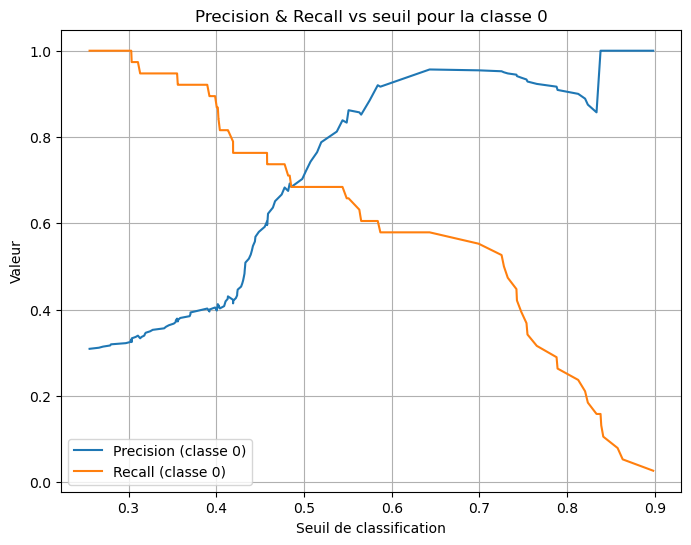

In [103]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Probabilités de la classe 0 (risqué)
y_proba_risky = 1 - best_model.predict_proba(X_test)[:,1]  # 1 - proba classe 1

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_risky, pos_label=0)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision (classe 0)')
plt.plot(thresholds, recall[:-1], label='Recall (classe 0)')
plt.xlabel('Seuil de classification')
plt.ylabel('Valeur')
plt.title('Precision & Recall vs seuil pour la classe 0')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
#Test
test_df=pd.read_csv("test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [136]:
best_threshold=best_threshold
preprocessor=preprocessor
df_new=test_df.iloc[[0]]
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [137]:
def predict_new_loan(model, threshold, df_new, preprocessor):
    """
    Prédit le risque d'un prêt pour de nouvelles demandes.
    
    Parameters:
        model: LogisticRegression entraîné
        threshold: seuil pour classer 0 ou 1
        df_new: DataFrame brut avec mêmes colonnes que le dataset initial
        preprocessor: ColumnTransformer déjà fit sur le dataset d'entraînement
    
    Returns:
        df_new avec colonnes 'prediction' et 'probability'
    """
    # 1️⃣ Appliquer le préprocesseur déjà fit
    X_new = df_new.drop(columns=['Loan_ID'], errors='ignore')
    X_new_processed = preprocessor.transform(X_new)  # IMPORTANT : transform, pas fit_transform
    
    # 2️⃣ Convertir en DataFrame si besoin (optionnel)
    X_new_processed = pd.DataFrame(X_new_processed, columns=preprocessor.get_feature_names_out(), index=df_new.index)
    
    # 3️⃣ Probabilité et prédiction
    proba = model.predict_proba(X_new_processed)[:,1]
    preds = (proba >= threshold).astype(int)
    
    # 4️⃣ Ajouter colonnes résultat
    df_result = df_new.copy()
    df_result['prediction'] = preds
    df_result['probability'] = proba
    
    return df_result


In [143]:
def predict_new_loan(best_model, best_threshold, preprocessor, df_new):
    # Drop Loan_ID si présent
    X_new = df_new.drop(columns=['Loan_ID'], errors='ignore')
    
    # Transformer les features avec le preprocessor déjà fit
    X_new_processed = preprocessor.transform(X_new)  # numpy array
    
    # Probabilités et prédictions
    proba = best_model.predict_proba(X_new_processed)[:,1]
    preds = (proba >= best_threshold).astype(int)
    
    # Ajouter les résultats au DataFrame original
    df_result = df_new.copy()
    df_result['prediction'] = preds
    df_result['probability'] = proba
    
    return df_result


In [144]:
# df_new : nouvelles lignes brutes
predictions_df = predict_new_loan(best_model, best_threshold, preprocessor, df_new)

print(predictions_df[['Loan_ID', 'prediction', 'probability']])


    Loan_ID  prediction  probability
0  LP001015           0     0.591087


C:\Users\SURFACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Mise en production

In [178]:
# -------------------------------
# 1️⃣ Créer le préprocesseur
# -------------------------------
def create_preprocessor():
    categorical_cols_binary = ['Gender','Married','Education','Self_Employed','Credit_History']
    categorical_cols_multi = ['Dependents','Property_Area']
    numerical_cols_log = ['ApplicantIncome','LoanAmount']
    numerical_cols_std = ['CoapplicantIncome','Loan_Amount_Term']
    
    # Pipeline pour colonnes numériques skew
    log_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('log', FunctionTransformer(np.log1p)),
        ('scaler', StandardScaler())
    ])
    
    # Pipeline pour autres numériques
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Pipeline pour catégorielles binaires
    binary_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='if_binary', dtype=int))
    ])
    
    # Pipeline pour catégorielles multi-classes
    multi_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
    ])
    
    # ColumnTransformer final
    preprocessor = ColumnTransformer(transformers=[
        ('num_log', log_transformer, numerical_cols_log),
        ('num_std', num_transformer, numerical_cols_std),
        ('cat_bin', binary_transformer, categorical_cols_binary),
        ('cat_multi', multi_transformer, categorical_cols_multi)
    ])
    
    return preprocessor

# -------------------------------
# 2️⃣ Préparer les données
# -------------------------------
def preprocess_and_split(df, test_size=0.2, random_state=42):
    df_copy = df.copy()
    
    # Séparer target
    y = df_copy['Loan_Status'].map({'Y':1, 'N':0})
    X = df_copy.drop(columns=['Loan_ID', 'Loan_Status'], errors='ignore')

    
    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# -------------------------------
# 3️⃣ Optimisation pipeline + Logistic
# -------------------------------
def optimize_pipeline_logistic_l2_show(X_train_raw, y_train, X_test_raw, y_test, preprocessor, seed=42):
    np.random.seed(seed)
    
    # Pipeline complète
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('logreg', LogisticRegression(
            class_weight='balanced',
            penalty='l2',
            solver='lbfgs',
            max_iter=5000,
            random_state=seed
        ))
    ])
    
    # GridSearch pour C
    param_grid = {'logreg__C': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', verbose=0)
    grid.fit(X_train_raw, y_train)
    
    pipeline_best = grid.best_estimator_
    
    # Probabilités sur test set
    y_proba = pipeline_best.predict_proba(X_test_raw)[:,1]
    
    # Recherche seuil optimal
    thresholds = np.arange(0.60, 0.62, 0.01)
    best_threshold = 0.5
    best_recall_0 = 0
    for t in thresholds:
        y_pred_thresh = (y_proba >= t).astype(int)
        recall_0 = ((y_pred_thresh[y_test==0]==0).sum()) / (y_test==0).sum()
        if recall_0 > best_recall_0:
            best_recall_0 = recall_0
            best_threshold = t
    
    # Prédictions finales
    y_pred_final = (y_proba >= best_threshold).astype(int)
    
    # Affichage résultats
    print(f"\n=== LogisticRegression_L2 optimisée ===")
    print(f"Meilleur C : {grid.best_params_['logreg__C']}, Seuil optimisé : {best_threshold:.2f}")
    print("\nClassification report :")
    print(classification_report(y_test, y_pred_final))
    print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_final))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"F1 macro: {f1_score(y_test, y_pred_final, average='macro'):.4f}")
    print(f"Recall classe 0 (risqué) : {((y_pred_final[y_test==0]==0).sum()) / (y_test==0).sum():.4f}")
    print(f"Recall classe 1 (sûr)    : {((y_pred_final[y_test==1]==1).sum()) / (y_test==1).sum():.4f}")
    
    return pipeline_best, best_threshold


In [179]:
# -------------------------------
# 4️⃣ Prédiction sur nouvelles données brutes
# -------------------------------
def predict_new_loans(pipeline_best, threshold, df_new):
    X_new = df_new.drop(columns=['Loan_ID'], errors='ignore')
    proba = pipeline_best.predict_proba(X_new)[:,1]
    preds = (proba >= threshold).astype(int)
    df_result = df_new.copy()
    df_result['probability'] = proba
    df_result['prediction'] = preds
    return df_result



In [180]:
# -------------------------------
# 5️⃣ test d'utilisation
# -------------------------------
preprocessor = create_preprocessor()
X_train, X_test, y_train, y_test = preprocess_and_split(df)
pipeline_best, best_threshold = optimize_pipeline_logistic_l2_show(X_train, y_train, X_test, y_test, preprocessor)


=== LogisticRegression_L2 optimisée ===
Meilleur C : 0.1, Seuil optimisé : 0.62

Classification report :
              precision    recall  f1-score   support

           0       0.40      0.92      0.56        38
           1       0.91      0.38      0.53        85

    accuracy                           0.54       123
   macro avg       0.66      0.65      0.54       123
weighted avg       0.75      0.54      0.54       123

Matrice de confusion :
 [[35  3]
 [53 32]]
ROC-AUC: 0.8266
F1 macro: 0.5444
Recall classe 0 (risqué) : 0.9211
Recall classe 1 (sûr)    : 0.3765


In [181]:
best_threshold=best_threshold
preprocessor=preprocessor
df_new=test_df.iloc[[0]]
df_new.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [183]:
df_predictions = predict_new_loans(pipeline_best, best_threshold, df_new)
print(df_predictions[['Loan_ID','prediction','probability']])

    Loan_ID  prediction  probability
0  LP001015           0     0.591184


In [187]:
## Sauvegarder le modèle 
import joblib
from datetime import datetime

# Chemin de sauvegarde
# Générer le nom de fichier pro avec date
today_str = datetime.today().strftime('%Y%m%d')
filename = f"loan_logreg_l2_v1_{today_str}.pkl"

# Sauvegarde
joblib.dump(full_pipeline, filename=filfilename)
print(f"Modèle sauvegardé dans {model_path}")


NameError: name 'full_pipeline' is not defined